In [1]:
!pip install openpyxl
#menginstal library openpyxl untuk membaca file excel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 20.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#menginstal library pandas, numpy, matplotlib, seaborn, sklearn untuk proses preprocessing

In [3]:
df = pd.read_excel('/work/Fraud Detection Dataset.xlsx')
df
#membaca dataset dari file excel ke dalam dataframe dan selanjutnya ditampilkan

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3,115,9,NaN
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...
50995,T33982,2339,3112.51,Bill Payment,15.0,Mobile,New York,0,7,8,Debit Card
50996,T31261,2152,2897.15,Online Purchase,3.0,Mobile,Miami,1,75,11,Net Banking
50997,T12293,3345,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card
50998,T42287,1518,4787.17,POS Payment,19.0,Tablet,New York,2,108,14,Net Banking


In [4]:
df.drop(['User_ID', 'Transaction_ID'], axis=1, inplace=True)
#menghapus kolom 'User_ID' dan 'Transaction_ID' dari dataframe

In [5]:
df.info()
#melihat informasi dari dataframe setelah dilakukan penghapusan pada kolom 'User_ID' dan 'Transaction_ID'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51000 entries, 0 to 50999
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_Amount                48480 non-null  float64
 1   Transaction_Type                  51000 non-null  object 
 2   Time_of_Transaction               48448 non-null  float64
 3   Device_Used                       48527 non-null  object 
 4   Location                          48453 non-null  object 
 5   Previous_Fraudulent_Transactions  51000 non-null  int64  
 6   Account_Age                       51000 non-null  int64  
 7   Number_of_Transactions_Last_24H   51000 non-null  int64  
 8   Payment_Method                    48531 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 3.5+ MB


# 1. Preprocessing

## 1.1 Drop Missing Values

### 1.1.1 Check the Columns with Nan Values 

In [6]:
df.isna().sum()
#melakukan pengecekan missing value dengan menghitung total missing value pada setiap kolom

Transaction_Amount                  2520
Transaction_Type                       0
Time_of_Transaction                 2552
Device_Used                         2473
Location                            2547
Previous_Fraudulent_Transactions       0
Account_Age                            0
Number_of_Transactions_Last_24H        0
Payment_Method                      2469
dtype: int64

count the percentage of missing values

In [7]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
#setelah mengetahui jumlah missing value, kita menghitung persentase missing value pada setiap kolom 

Transaction_Amount - 5%
Transaction_Type - 0%
Time_of_Transaction - 5%
Device_Used - 5%
Location - 5%
Previous_Fraudulent_Transactions - 0%
Account_Age - 0%
Number_of_Transactions_Last_24H - 0%
Payment_Method - 5%


Missing values from each column only 5% of all data. so we can drop a row that contain missing value

### 1.1.2 Drop Missing Values

In [8]:
df_no_nan = df.dropna()
df_no_nan.isna().sum()
#membuat dataframe baru yang tidak mengandung missing value selanjutnya melakukan pengecekan jumlah missing value dan hasilnya tidak ada lagi kolom yang mengandung missing value

Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
dtype: int64

now our data have no missing value for each features

## 1.2 Drop Duplicate Values

### 1.2.1 Check the duplicate value in dataset

In [9]:
df_no_nan.duplicated().sum()
#melakukan pengecekan duplicate value pada dataframe 'df_no_nan' dengan menghitung total duplicate value

688

Total duplicate values in df_no_nan is 688 data

### 1.2.2 Drop Duplicate Values

In [10]:
df_cleaned = df_no_nan.drop_duplicates()
df_cleaned.duplicated().sum()
#membuat dataframe baru yang tidak mengandung duplicate value selanjutnya melakukan pengecekan duplicate value dan melihat total duplicate value

0

now our data has 0 duplicate value

## 1.3 Encoding Categorical Features

### 1.3.1 Check Categorical Features from dataset

In [11]:
categorical = [var for var in df_cleaned.columns if df_cleaned[var].dtype=='O']
for col in categorical:
    print(col, 'unique values:',df_cleaned[col].unique())
#membuat list 'categorical' yang berisi kolom-kolom categorical pada dataframe 'df_cleaned' dan melihat unique value dari masing-masing kolom

Transaction_Type unique values: ['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Device_Used unique values: ['Tablet' 'Mobile' 'Desktop' 'Unknown Device']
Location unique values: ['San Francisco' 'New York' 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']
Payment_Method unique values: ['Debit Card' 'Credit Card' 'UPI' 'Net Banking' 'Invalid Method']


In [12]:
df_cleaned
#menampilkan dataframe yang telah dibersihkan, yang berarti tidak ada missing value dan tidak ada duplicate value

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method
0,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0,119,13,Debit Card
1,1554.58,ATM Withdrawal,13.0,Mobile,New York,4,79,3,Credit Card
3,100.10,Bill Payment,15.0,Desktop,Chicago,4,3,4,UPI
4,1490.50,POS Payment,19.0,Mobile,San Francisco,2,57,7,Credit Card
5,2372.04,ATM Withdrawal,15.0,Desktop,Boston,3,96,14,Credit Card
...,...,...,...,...,...,...,...,...,...
50947,1073.04,Bill Payment,14.0,Desktop,Houston,0,94,3,Credit Card
50975,1826.49,POS Payment,10.0,Desktop,Houston,1,91,4,Net Banking
50985,544.53,Bank Transfer,14.0,Unknown Device,Chicago,4,59,12,Debit Card
50997,2204.43,POS Payment,18.0,Mobile,San Francisco,3,73,5,Credit Card


### 1.3.2 Encode Categorical Features

Using Frequency Encoding for Encode 'Location' features because it has 8 unique value and to prevent dimension increase. Using one hot encoding for encode 'Transaction_Type', 'Device_Used',  and 'Payment_Method' because it has a few unique values

In [13]:
#membuat list `cat_cols` yang berisi nama kolom kategorikal, kecuali kolom 'Location'
cat_cols = [col for col in categorical if col != 'Location']

#membuat salinan DataFrame `df_cleaned` ke dalam `df_encoded` untuk menjaga DataFrame asli tetap utuh
df_encoded = df_cleaned.copy()

#mengonversi kolom 'Location' menjadi probabilitas kategori berdasarkan frekuensi kemunculan setiap kategori `value_counts(normalize=True)` kemudian menghitung proporsi relatif untuk masing-masing kategori dalam kolom 'Location'
df_encoded['Location'] = df_encoded['Location'].map(df_cleaned['Location'].value_counts(normalize=True))

#mengonversi kolom kategorikal yang ada di `cat_cols` menjadi kolom dummy (variabel biner) dan dengan `drop_first=False` memastikan kita tidak menghilangkan kategori referensi
dummy_columns = pd.get_dummies(df_cleaned[cat_cols], drop_first=False)

#menghapus kolom kategorikal asli dari DataFrame `df_encoded`
df_encoded = df_encoded.drop(cat_cols, axis=1)

#menggabungkan kolom dummy yang dihasilkan dengan DataFrame `df_encoded`
df_encoded = pd.concat([df_encoded, dummy_columns], axis=1)

#mengubah nilai boolean (True/False) pada kolom dummy menjadi angka 1 dan 0
df_encoded.iloc[:, -14:] = df_encoded.iloc[:, -14:].apply(lambda x: x.map({True: 1, False: 0}))

In [14]:
df_encoded
#menampilkan dataframe 'df_encoded' setelah dilakukan encoding

,Transaction_Amount,Time_of_Transaction,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI
0,1292.76,16.0,0.124515,0,119,13,1,0,0,0,0,0,0,1,0,0,1,0,0,0
1,1554.58,13.0,0.125209,4,79,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0
3,100.10,15.0,0.124695,4,3,4,0,0,1,0,0,1,0,0,0,0,0,0,0,1
4,1490.50,19.0,0.124515,2,57,7,0,0,0,0,1,0,1,0,0,1,0,0,0,0
5,2372.04,15.0,0.127291,3,96,14,1,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50947,1073.04,14.0,0.123358,0,94,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0
50975,1826.49,10.0,0.123358,1,91,4,0,0,0,0,1,1,0,0,0,0,0,0,1,0
50985,544.53,14.0,0.124695,4,59,12,0,1,0,0,0,0,0,0,1,0,1,0,0,0
50997,2204.43,18.0,0.124515,3,73,5,0,0,0,0,1,0,1,0,0,1,0,0,0,0


## 1.4 Handling Outlier

### 1.4.1 Outlier Detection

Outlier Detection using Visualization

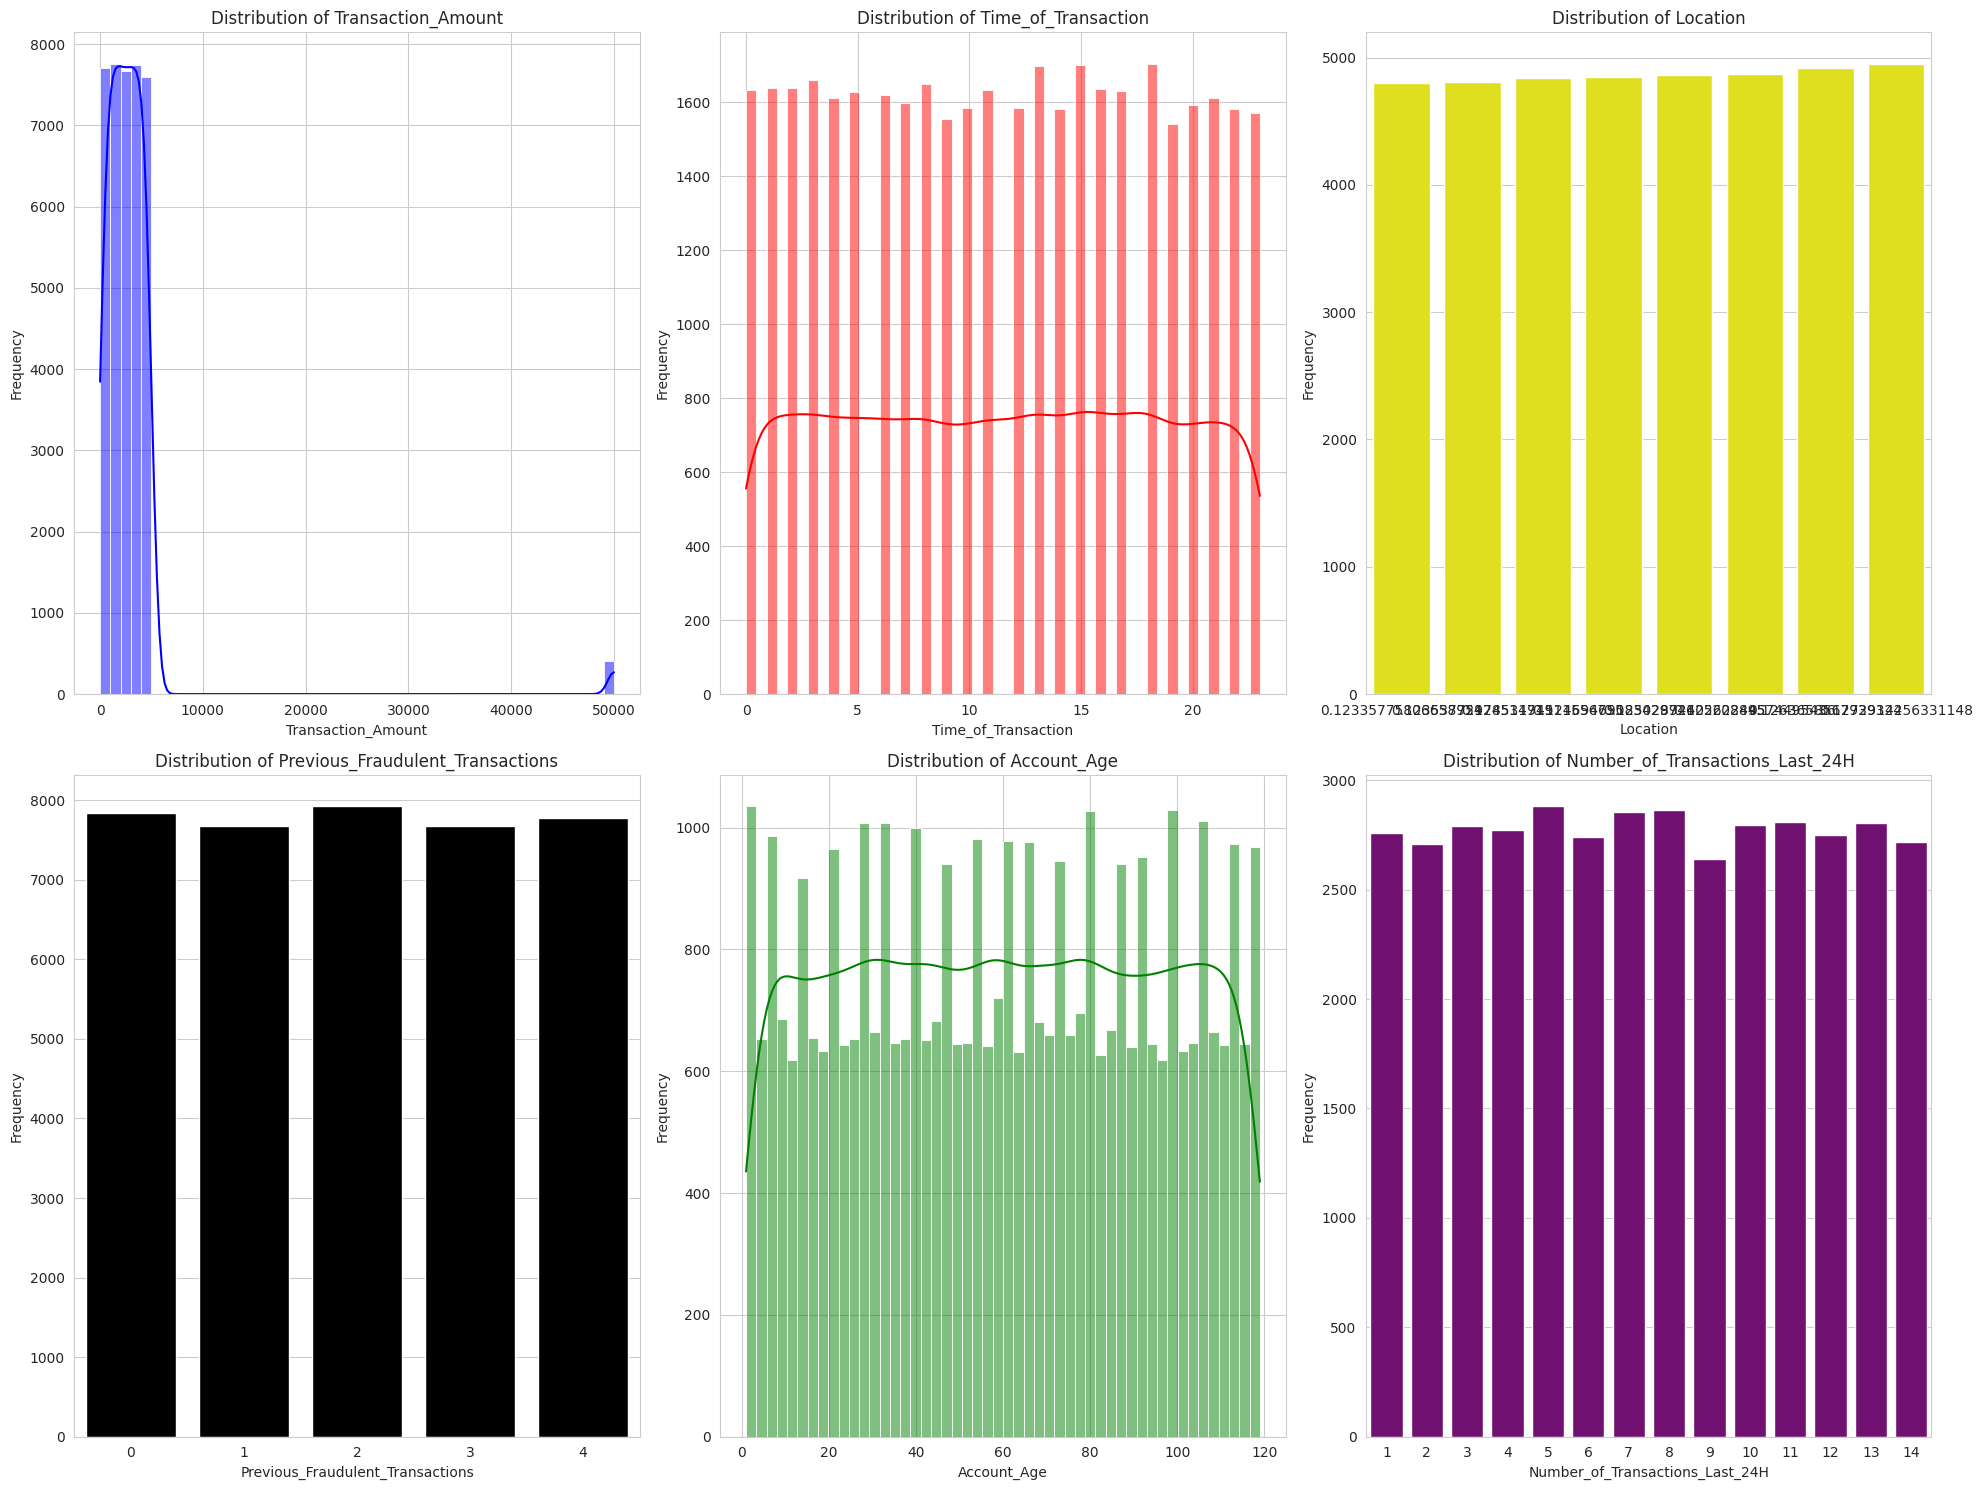

In [15]:
sns.set_style('whitegrid')
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

#plot for Transaction_Amount
sns.histplot(df_encoded['Transaction_Amount'], bins=50, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Distribution of Transaction_Amount')
axes[0, 0].set_xlabel('Transaction_Amount')
axes[0, 0].set_ylabel('Frequency')

#plot for Time_of_Transaction
sns.histplot(df_encoded['Time_of_Transaction'], bins=50, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Distribution of Time_of_Transaction')
axes[0, 1].set_xlabel('Time_of_Transaction')
axes[0, 1].set_ylabel('Frequency')

#plot for Location
sns.countplot(x='Location', data=df_encoded, ax=axes[0, 2], color='yellow')
axes[0, 2].set_title('Distribution of Location')
axes[0, 2].set_xlabel('Location')
axes[0, 2].set_ylabel('Frequency')

#plot for Previous_Fraudulent_Transactions
sns.countplot(x='Previous_Fraudulent_Transactions', data=df_encoded, ax=axes[1, 0], color='black')
axes[1, 0].set_title('Distribution of Previous_Fraudulent_Transactions')
axes[1, 0].set_xlabel('Previous_Fraudulent_Transactions')
axes[1, 0].set_ylabel('Frequency')

#plot for Account_Age
sns.histplot(df_encoded['Account_Age'], bins=50, kde=True, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Distribution of Account_Age')
axes[1, 1].set_xlabel('Account_Age')
axes[1, 1].set_ylabel('Frequency')

#plot for Number_of_Transactions_Last_24H
sns.countplot(x='Number_of_Transactions_Last_24H', data=df_encoded, ax=axes[1, 2], color='purple')
axes[1, 2].set_title('Distribution of Number_of_Transactions_Last_24H')
axes[1, 2].set_xlabel('Number_of_Transactions_Last_24H')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
#membuat visualisasi dalam bentuk plot menggunakan seaborn untuk melihat distribusi dari setiap kolom
#menampilkan histogram dengan KDE untuk variabel numerik ('Transaction_Amount', 'Time_of_Transaction', dan 'Account_Age')untuk melihat pola distribusi data
#menggunakan countplot untuk variabel kategorikal ('Location', 'Previous_Fraudulent_Transactions', dan 'Number_of_Transactions_Last_24H') untuk melihat jumlah kemunculan tiap kategori
#warna berbeda digunakan untuk membedakan setiap plot agar lebih mudah dianalisis.
#plt.tight_layout() digunakan untuk mencegah tumpang tindih antar plot dan memastikan tampilan lebih rapi.
#plt.show() digunakan untuk menampilkan semua plot yang telah dibuat.


pada distribusi data 'Transaction_Amount' sangat condong ke kiri, hal ini menunjukkan adanya beberapa transaksi dengan jumlah yang sangat besar di bawah 10000, terdapat juga kemungkinan outlier. Distribusi dari data 'Account_Age' cukup merata dengan pola yang mirip normal, meskipun ada sedikit fluktuasi.

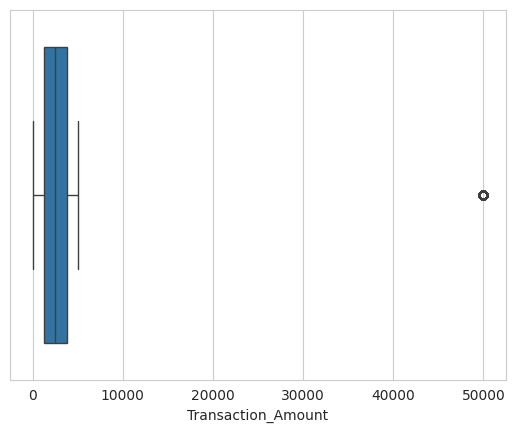

In [16]:
sns.boxplot(data=df_encoded, x='Transaction_Amount')
#Menggunakan library seaborn untuk visualisasi data dalam boxplot dengan parameter df_encoded yang mengandung kolom Transaction_Amount sebagai sumbu x dari boxplot
plt.show()
#Menampilkan grafik yang dibuat
#Grafik yang tertampil menampilkan median, IQR dan outlier pada ujung kotak

Outlier Detection using IQR

In [17]:
Q1 = df_encoded['Transaction_Amount'].quantile(0.25)
#Menghitung kuartil pertama (Q1) yang memisahkan 25% nilai terkecil dataset
Q3 = df_encoded['Transaction_Amount'].quantile(0.75)
#Menghitung kuartil tiga (Q3) yang memisahkan 75% nilai terkecil dataset
IQR = Q3 - Q1
#Menghitung interquartile range (IQR) atau rentang selisih Q1 dan Q3

lower_bound = Q1 - 1.5 * IQR 
#Batas bawah deteksi outlier
upper_bound = Q3 + 1.5 * IQR
#Batas atas deteksi outlier

outliers = df_encoded[(df_encoded['Transaction_Amount'] < lower_bound) | 
                     (df_encoded['Transaction_Amount'] > upper_bound)]['Transaction_Amount']
#Mencari outlier dengan membuat subset data nilai traksaksi yang lebih kecil dari batas bawah dan lebih besar dari batas atas

#Menampilkan hasil perhitungan deteksi outlier
print("Summary of Transaction Amount Outlier Detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"\nNumber of outliers detected: {len(outliers)}")
print(f"Percentage of outliers: {(len(outliers)/len(df_encoded['Transaction_Amount'])*100):.2f}%")

#Menampilkan contoh nilai outlier
print("\nSample of outlier values:")
print(outliers.head())

Summary of Transaction Amount Outlier Detection:
Q1: 1267.43
Q3: 3779.16
IQR: 2511.73
Lower bound: -2500.16
Upper bound: 7546.76

Number of outliers detected: 411
Percentage of outliers: 1.06%

Sample of outlier values:
166    49997.8
245    49997.8
298    49997.8
317    49997.8
421    49997.8
Name: Transaction_Amount, dtype: float64


### 1.4.2 Imputation Outlier

replace the outlier values with median value 

In [18]:
df_median = df_encoded.copy()

column_data = df_median['Transaction_Amount']

Q1 = np.percentile(column_data, 25)
Q3 = np.percentile(column_data, 75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = column_data[(column_data < lower) | (column_data > upper)]

median = column_data.median()

df_median.loc[(df_median['Transaction_Amount'] < lower) | 
              (df_median['Transaction_Amount'] > upper), 'Transaction_Amount'] = median

Visualization of Transaction_Amount Data Distribution After Imputation Outlier

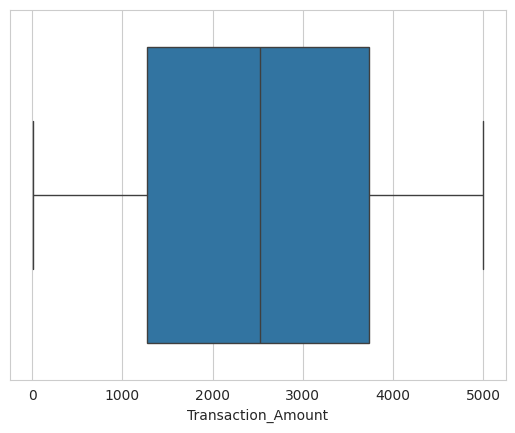

In [19]:
sns.boxplot(data=df_median, x='Transaction_Amount')
plt.show()

# 2. Normalization Data Using MinMax Scaler

### 2.1 Initialization of features to be normalized

In [31]:
df_median.describe()
numeric_columns = ['Transaction_Amount', 'Account_Age']

The  feature exhibits a wide range of values, with a minimum of 5.03 and a maximum of 49,997.8, indicating the need for normalization to ensure consistent scaling. Similarly, the significant difference between the minimum and maximum values of the  feature further emphasizes the importance of applying normalization methods to enhance the processing and analysis of the dataset.

### 2.2 Normalization

In [33]:
scaler = MinMaxScaler()

x = scaler.fit_transform(df_median[numeric_columns])
df_standart = pd.DataFrame(x, columns=numeric_columns)  
df_standart.describe()

,Transaction_Amount,Account_Age
count,38895.000000,38895.000000
mean,0.498670,0.499427
std,0.286116,0.290928
min,0.000000,0.000000
25%,0.252746,0.245763
50%,0.503821,0.500000
75%,0.745892,0.754237
max,1.000000,1.000000


In [35]:
df_scaled = df_median.drop(numeric_columns, axis=1)
df_scaled = pd.concat([df_scaled.reset_index(drop=True), df_standart], axis=1)

In [36]:
df_scaled

,Time_of_Transaction,Location,Previous_Fraudulent_Transactions,Number_of_Transactions_Last_24H,Transaction_Type_ATM Withdrawal,Transaction_Type_Bank Transfer,Transaction_Type_Bill Payment,Transaction_Type_Online Purchase,Transaction_Type_POS Payment,Device_Used_Desktop,Device_Used_Mobile,Device_Used_Tablet,Device_Used_Unknown Device,Payment_Method_Credit Card,Payment_Method_Debit Card,Payment_Method_Invalid Method,Payment_Method_Net Banking,Payment_Method_UPI,Transaction_Amount,Account_Age
0,16.0,0.124515,0,13,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0.257817,1.000000
1,13.0,0.125209,4,3,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0.310236,0.661017
2,15.0,0.124695,4,4,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0.019034,0.016949
3,19.0,0.124515,2,7,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0.297406,0.474576
4,15.0,0.127291,3,14,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0.473900,0.805085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38890,14.0,0.123358,0,3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0.213827,0.788136
38891,10.0,0.123358,1,4,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0.364675,0.762712
38892,14.0,0.124695,4,12,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0.108013,0.491525
38893,18.0,0.124515,3,5,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0.440342,0.610169


# 3. Dimension Reduction Using PCA (Principle Component Analysis)

In [50]:
pca = PCA(n_components=2) #memilih 2 komponen untuk memudahkan visualisasi data secara 2D
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca

,PC1,PC2,cluster
0,4.490615,5.545538,0
1,1.579688,-4.481442,0
2,3.570800,-3.465698,0
3,7.544468,-0.428823,0
4,3.481957,6.536607,0
...,...,...,...
38890,2.579369,-4.470795,0
38891,-1.429044,-3.508660,1
38892,2.499227,4.524805,0
38893,6.562111,-2.438096,0


# 4. Clustering Using K-Means

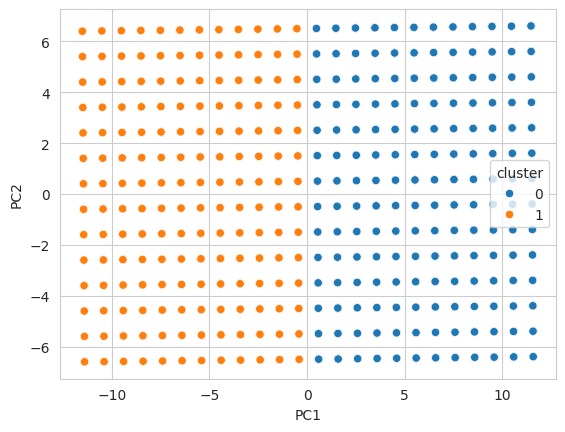

In [60]:
kmean = KMeans(n_clusters=2) #memilih 2 cluster karena ingin menentukan 2 kelas yaitu fraud dan non-fraud
kmean.fit(df_pca)
kmean.labels_

df_pca['cluster'] = kmean.labels_

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="cluster")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=063e6764-8135-4301-bc56-3ccb8f64d810' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>